In [1]:
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib
import datetime as dt
import statsmodels.api as sm

In [2]:
DJIA = pd.read_csv("HistoricalPrices.csv")

In [3]:
DJIA

,Date,Close
0,12/31/19,28538.44
1,12/30/19,28462.14
2,12/27/19,28645.26
3,12/26/19,28621.39
4,12/24/19,28515.45
...,...,...
2764,01/07/09,8769.70
2765,01/06/09,9015.10
2766,01/05/09,8952.89
2767,01/02/09,9034.69


In [4]:
DJIA = DJIA.reindex(index=DJIA.index[::-1])
#DJIA = DJIA['Date'].astype('datetime64[D]')



In [5]:
DJIA = DJIA.reset_index()
del DJIA['index']
DJIA

,Date,Close
0,12/31/08,8776.39
1,01/02/09,9034.69
2,01/05/09,8952.89
3,01/06/09,9015.10
4,01/07/09,8769.70
...,...,...
2764,12/24/19,28515.45
2765,12/26/19,28621.39
2766,12/27/19,28645.26
2767,12/30/19,28462.14


In [7]:
#del DJIA['level_0']
DJIA

,Date,Close
0,12/31/08,8776.39
1,01/02/09,9034.69
2,01/05/09,8952.89
3,01/06/09,9015.10
4,01/07/09,8769.70
...,...,...
2764,12/24/19,28515.45
2765,12/26/19,28621.39
2766,12/27/19,28645.26
2767,12/30/19,28462.14


In [8]:


DJIA.dtypes

Date      object
Close    float64
dtype: object

In [9]:
DJIA['percentage'] = DJIA.Close.pct_change()
DJIA = DJIA.dropna()

In [10]:
DJIA

,Date,Close,percentage
1,01/02/09,9034.69,0.029431
2,01/05/09,8952.89,-0.009054
3,01/06/09,9015.10,0.006949
4,01/07/09,8769.70,-0.027221
5,01/08/09,8742.46,-0.003106
...,...,...,...
2764,12/24/19,28515.45,-0.001264
2765,12/26/19,28621.39,0.003715
2766,12/27/19,28645.26,0.000834
2767,12/30/19,28462.14,-0.006393


In [11]:
bse = pd.read_csv("bse-sensex.csv")
#del bse['Open']
#del bse['High']
#del bse['lagged-index']



In [12]:
bse['Date'] = bse['Date'].astype('datetime64[D]')
DJIA['Date'] = DJIA['Date'].astype('datetime64[D]')

/Users/garg/anaconda3/envs/Thesis-2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
DJIA

,Date,Close,percentage
1,2009-01-02,9034.69,0.029431
2,2009-01-05,8952.89,-0.009054
3,2009-01-06,9015.10,0.006949
4,2009-01-07,8769.70,-0.027221
5,2009-01-08,8742.46,-0.003106
...,...,...,...
2764,2019-12-24,28515.45,-0.001264
2765,2019-12-26,28621.39,0.003715
2766,2019-12-27,28645.26,0.000834
2767,2019-12-30,28462.14,-0.006393


In [14]:
bse['percentage'] = bse.Close.pct_change()

In [15]:
bse = bse.dropna()
bse

,Date,Close,percentage
1,2009-01-01,3691.75,0.026384
2,2009-01-02,3725.38,0.009110
3,2009-01-05,3823.75,0.026405
4,2009-01-06,3838.58,0.003878
5,2009-01-07,3568.45,-0.070372
...,...,...,...
2717,2019-12-24,15659.03,-0.002989
2718,2019-12-26,15581.54,-0.004949
2719,2019-12-27,15726.46,0.009301
2720,2019-12-30,15748.18,0.001381


In [16]:
bse['lagged']= bse.Close.shift(1)
bse


,Date,Close,percentage,lagged
1,2009-01-01,3691.75,0.026384,NaN
2,2009-01-02,3725.38,0.009110,3691.75
3,2009-01-05,3823.75,0.026405,3725.38
4,2009-01-06,3838.58,0.003878,3823.75
5,2009-01-07,3568.45,-0.070372,3838.58
...,...,...,...,...
2717,2019-12-24,15659.03,-0.002989,15705.98
2718,2019-12-26,15581.54,-0.004949,15659.03
2719,2019-12-27,15726.46,0.009301,15581.54
2720,2019-12-30,15748.18,0.001381,15726.46


In [17]:
xyz = pd.DataFrame()
xyz['DJIA'] = bse['Date'].map(DJIA.set_index('Date')['Close'])
xyz['bse'] = bse.Close.values
xyz

,DJIA,bse
1,NaN,3691.75
2,9034.69,3725.38
3,8952.89,3823.75
4,9015.10,3838.58
5,8769.70,3568.45
...,...,...
2717,28515.45,15659.03
2718,28621.39,15581.54
2719,28645.26,15726.46
2720,28462.14,15748.18


In [18]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
#import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [19]:
X = xyz['DJIA'].values.reshape(-1,1)
y = xyz['bse'].values.reshape(-1,1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
#regressor = LinearRegression()  
#regressor.fit(X_train, y_train) #training the algorithm

In [24]:
#y_pred = regressor.predict(X_test)

In [25]:
#xyz.to_csv("regression.csv")

In [30]:
xyz = xyz.dropna()
xyz

,DJIA,bse
2,9034.69,3725.38
3,8952.89,3823.75
4,9015.10,3838.58
5,8769.70,3568.45
6,8599.18,3492.20
...,...,...
2717,28515.45,15659.03
2718,28621.39,15581.54
2719,28645.26,15726.46
2720,28462.14,15748.18


Text(0.5, 1.0, 'Cross-correlation')

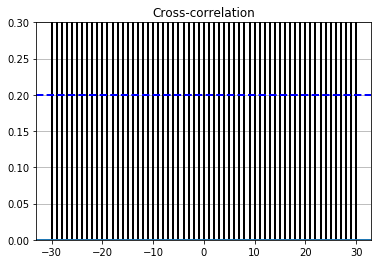

In [31]:
plt.xcorr(xyz['DJIA'], xyz['bse'], usevlines=True, maxlags=30, normed=True, lw=2)
plt.grid(True)
plt.axhline(0.2, color='blue', linestyle='dashed', lw=2)
plt.ylim([0, 0.3])
plt.title("Cross-correlation")

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.99105364, 0.99157561, 0.99209589, 0.9926221 , 0.99314921,
        0.99368009, 0.994214  , 0.99475591, 0.9953045 , 0.99584445,
        0.99636952, 0.99587415, 0.99537314, 0.99487344, 0.99438632,
        0.9938929 , 0.99340049, 0.99290771, 0.99241859, 0.99193067,
        0.99144418]),
 <matplotlib.lines.Line2D at 0x7f890f679e10>)

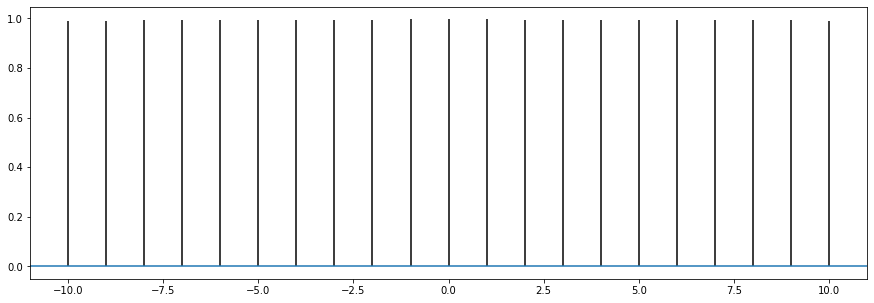

In [34]:
N, M = 15, 5
fig, ax = plt.subplots(figsize=(N, M))
matplotlib.pyplot.xcorr(xyz['DJIA'],xyz['bse'])

In [35]:
xyz.corr()

,DJIA,bse
DJIA,1.000000,0.964367
bse,0.964367,1.000000


In [ ]:
#del bse['nasdaq']

In [ ]:
India_Nasdaq = pd.DataFrame()
India_Nasdaq['Date'] = bse.Date.values
India_Nasdaq['DJIA_index'] = bse['Date'].map(DJIA.set_index('Date')['Close'])
India_Nasdaq = India_Nasdaq.dropna()


In [ ]:
India_Nasdaq['BSE'] = bse.Close
India_Nasdaq.to_csv("File.csv")

In [ ]:
India_Nasdaq['DJIA_index'].isnull()

In [ ]:
India_Nasdaq['lagged'] = 


In [ ]:
plt.figure(figsize=(35,15))
plt.xlabel('Number of requests every 10 minutes')

ax1 = bse.percentage.plot(color='blue', grid=True, label='BSE')
ax2 = DJIA.percentage.plot(color='red', grid=True, secondary_y=True, label='DJIA')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
N, M = 20, 15
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(bse['Close'], lags=60,ax=ax)
pyplot.show()